In [1]:
#Placing the data in a data frame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
df = pd.read_csv("homes.csv") 

In [2]:
#describing the data set
df.describe()
df = df.dropna()

The data set comprises of 9 different columns containing information for 50 homes.


count: The number of observations. In this case, there are 50 observations for each variable.

mean: The average value of each variable. For example, the mean selling price is $170,360, and the mean living space is 21.12 square feet.

std: The standard deviation of each variable, which measures how much the values vary from the mean. For example, the standard deviation of selling price is $72,755.89, and the standard deviation of living space is 8.35 square feet.
min: The minimum value of each variable. For example, the lowest selling price is $87,000, and the smallest living space is 10 square feet. 

25%: The first quartile of each variable, which is the median of the lower half of the values. For example, 25% of the homes have a selling price less than or equal to $135,000, and 25% of the homes have a living space less than or equal to 17 square feet.

50%: The second quartile or the median of each variable, which is the middle value of the values. For example, 50% of the homes have a selling price less than or equal to $152,000, and 50% of the homes have a living space less than or equal to 20 square feet.

75%: The third quartile of each variable, which is the median of the upper half of the values. For example, 75% of the homes have a selling price less than or equal to $182,250, and 75% of the homes have a living space less than or equal to 22.75 square feet.

max: The maximum value of each variable. For example, the highest selling price is $567,000, and the largest living space is 64 square feet.



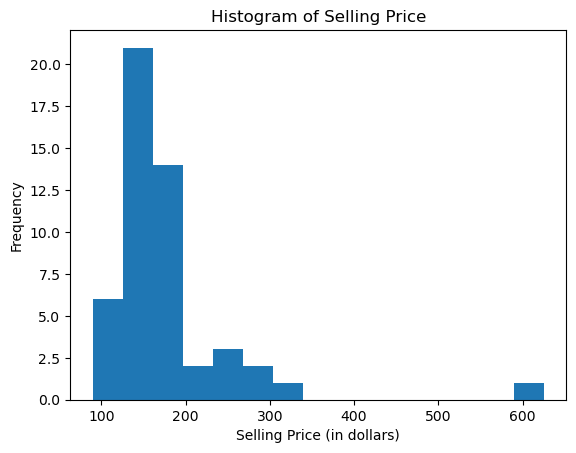

In [3]:

plt.hist(df["List"], bins=15) # creating a histogram with 10 bins
plt.title("Histogram of Selling Price") # adding a title
plt.xlabel("Selling Price (in dollars)") # adding an x-axis label
plt.ylabel("Frequency") # adding a y-axis label
plt.show() # showing the plot

Histogram of selling price.

I'm going to be using the plt.hist() function from metaplotlib. Adding titles to the x and y as well as the histogram as a whole to the "List" column. This gives us not only the selling price but also the frequency that shows in those 50 observations. 

The histogram shows that it is left leaning. Meaning that most homes are sold for lower prices, but we can see that we have that outlier on the right that there is one home sold for a higher price. Something interesting is that batween (eyeballing it here) the selling price of $325 and $510 there is a gap which indicates there are some values not present in the data.

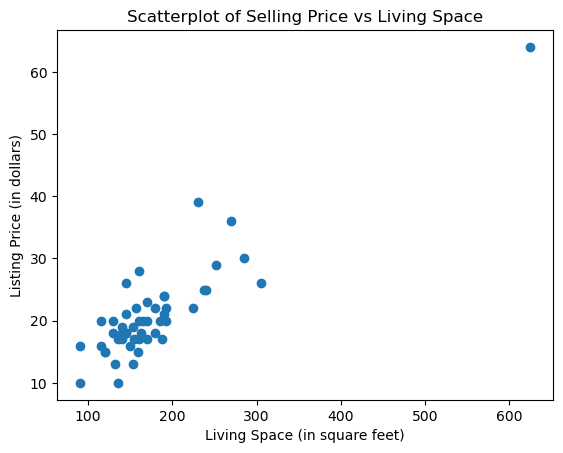

In [4]:
plt.scatter(df["List"], df["Living"]) # creating a scatterplot
plt.title("Scatterplot of Selling Price vs Living Space") # adding a title
plt.xlabel("Living Space (in square feet)") # adding an x-axis label
plt.ylabel("Listing Price (in dollars)") # adding a y-axis label
plt.show() # showing the plot

Used the plt.scatter() to create a scatterblot between living space and selling price. This shows us the relationship between two variables (in this case, Living and living.). 

It shows that the bigger it is the higher the price required. Having a right postivie coeficient with it. Most homes being in the cheaper side with less living spaces. I did this to show a corelation between Living Space and Listing price. Giving us and insighit into the data.


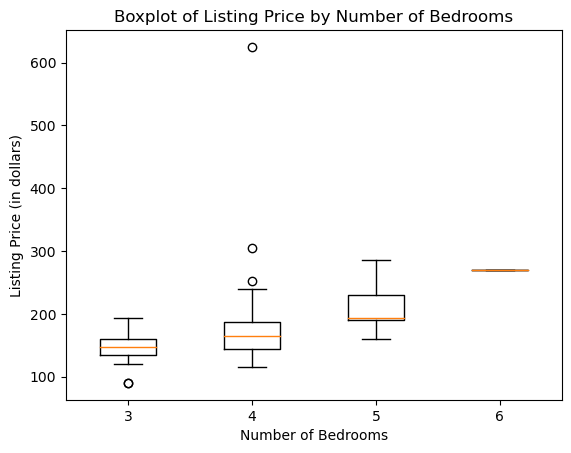

In [5]:
plt.boxplot([df["List"][df["Beds"] == i] for i in range(3, 7)]) # creating a boxplot for each category of bedrooms
plt.title("Boxplot of Listing Price by Number of Bedrooms") # adding a title
plt.xlabel("Number of Bedrooms") # adding an x-axis label
plt.ylabel("Listing Price (in dollars)") # adding a y-axis label
plt.xticks([1, 2, 3, 4], [3, 4, 5, 6]) # setting the x-axis ticks and labels
plt.show() # showing the plot


 #I cant do the boxplot with Sell because it is listed as an object. Haven't been able to figure out why. Instead I'm going to use List


The boxplot shows that listing price tends to increase with the number of bedrooms, meaning with more bedrooms they are listed for a higher price. It also shows some outliers, with a house priced at 600+ having 4 bedrooms. The Boxplot shows the average, standard deviation, min max and the outliers. Which, apparently, all exsist in the 4 bedroom section.



In [6]:
y = df['List'] #my data frame doesn't ket me use sell since it sees it as an object.Using list instead.
x = df['Taxes']
x = sm.add_constant(x) #adds a constant to the model
x.head()
df.dtypes

Sell       object
List      float64
Living    float64
Rooms     float64
Beds      float64
Baths     float64
Age       float64
Acres     float64
Taxes     float64
dtype: object

In [9]:
modelh = sm.OLS(y,x).fit()
modelh.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   List   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     221.6
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.29e-19
Time:                        14:26:31   Log-Likelihood:                -246.01
No. Observations:                  50   AIC:                             496.0
Df Residuals:                      48   BIC:                             499.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5128     12.308      0.773      0.443     -15.235      34.261
Taxes          0.0456      0.003     14.888      0.000       0.039       0.052
==============================================================================
Omnibus:                       26.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.092
Skew:                           1.644   Prob(JB):                     2.19e-11
Kurtosis:                       6.572   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It is a good predictor. We can see that it is good based upon the p-value. Being almost at 0. Nevertheless further analysis would be good since the coefficient is small. Saying that the impact is minimal.

In [11]:
y2 = df['List'] #my data frame doesn't ket me use sell since it sees it as an object.Using list instead.
x2 = df['Acres']
x2 = sm.add_constant(x2) #adds a constant to the model
x2.head()

modely = sm.OLS(y2,x2).fit()
modely.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   List   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.374
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.247
Time:                        14:49:05   Log-Likelihood:                -288.45
No. Observations:                  50   AIC:                             580.9
Df Residuals:                      48   BIC:                             584.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        166.9956     14.789     11.292      0.000     137.260     196.731
Acres         11.1155      9.482      1.172      0.247      -7.949      30.180
==============================================================================
Omnibus:                       75.651   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              955.396
Skew:                           3.990   Prob(JB):                    3.45e-208
Kurtosis:                      22.872   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case. Taxes is a better predictor since R sqaured is larger. Acres does have a bigger coefficient so it has more weight in sales. The biggest limitaton is lack of variables. I do believe that one of the biggest variables that do have a weight on listing is location.